# Resolution of a dynamical system oforder 2

Let's consider the following one-degree-of-freedom system: a vertical articulated rigid bar of length $L$ with a concentrated mass $M$ at its end (we will neglect the lineic mass of the rigid bars). The first bar of the system is fixed on an infinitely rigid and massive base.

The articulated rigid bar is allowed to rotate at point $B$ thanks to a viscoelastic hinge characterized by a rotating stiffness $k$ and a viscous rotational damping $c$. The motion of the rigid structure is parametrized by the angle $\theta\left(t\right)$ between the two bars. Such a system could be a very simplified model of a post fixed on a ground. 



<img  src="Figures sujet/1dof_dynamic_loading_new.png" width=500/>


Using a Lagrange formalism, it is not too difficult to find the equation of motion governing the mass [1] :

\begin{equation}ML^2\ddot{\theta} + c\dot{\theta} + k\theta - MgL\sin\theta = 0.\label{eq11}\end{equation}

By introducing the dimensionless variables $\tau = \omega t$ with $\omega=\sqrt{k/ML^2}$ the natural frequency and dividing the equation by $k$, we can rewrite the aforementioned equation in the dimensionless form

\begin{equation}\theta'' + \frac{1}{Q}\theta' + \theta  - p\sin\theta = 0\end{equation}

where $'$ denotes differentiation with respect to $\tau$, $Q = \frac{\sqrt{kML^2}}{c}$ is the quality factor and $p = MgL/k$, a crucial dimensionless loading parameter for the static problem modeling the ratio between weight and stiffness of the system.

For convenience, we can now transform this nonlinear Ordinary Differential Equation from the physical to the state space, by writing the above in the form of a dynamical system $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\tau)$:

\begin{equation}\left\{\begin{array}{ll}
\theta' = \phi \\
\phi' = - \frac{1}{Q}\phi - \theta +p\sin\theta\end{array}\right.\end{equation}

where $\mathbf{x}(\tau) = \{\theta(\tau), \phi(\tau)\}^T$ is the $2$-dimensional state vector and $\mathbf{f}(\mathbf{x},\tau)$ is a nonlinear $2$-dimensional vector.

In [1]:
import numpy as np
import cmath as cm

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import odeint
from scipy.optimize import fsolve
import scipy.linalg

from numpy import linalg as LA
from numpy.linalg import inv

%matplotlib inline

What we can do is to solve the dynamical system numerically and represent it as a function of time $\tau$. Depending on $p$, the trajectories are qualitatively different. For example, for $p=0.75$ and $\mathbf{x}(0) = \{10, 10\}^T$, we get (we have radians in y-axis):

<img  src="Figures sujet/Trajectory_p0p75.png" width=500/>

This time, we don't consider analytical solution but rather a comparison linear/non-linear approaches :

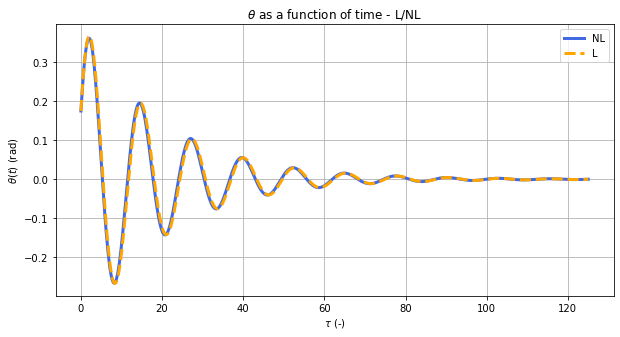

In [2]:
#data
Q = 10.0
p =  0.75 # control parameter

theta0, d_theta0 = 10, 10
x = np.array([theta0, d_theta0]) * np.pi/180 #from degrees to radiants

# ---------------
# system to solve
# ---------------

def NL_system(x, t):
    
    """ Function returning non-linear system describing
    angular position of vertical beam, provided intial con-
    ditions and time along which we solve differential system.
    """
    
    theta, d_theta = x
    
    dxdt = [d_theta, -1/Q * d_theta - theta + p*np.sin(theta)]
    
    return dxdt

def L_system(x, t):
    
    """ Function returning linear system describing angular 
    position of vertical beam, provided intial conditions and
    time along which we solve differential system.
    """
    
    theta, d_theta = x
    
    J = np.array([[0    ,  1  ],
                  [p - 1, -1/Q]])
        
    dxdt = np.dot(J, x)
    
    return dxdt

# ------------
# solve system
# ------------

t = np.linspace(0, 125, 1000)
u_sol_NL = odeint(NL_system, x, t)
u_sol_L  = odeint( L_system, x, t)

plt.figure(figsize=(10,5))

plt.plot(t, u_sol_NL[:,0], '-' , color='royalblue', lw=3, label='NL')
plt.plot(t, u_sol_L [:,0], '--', color='orange'   , lw=3, label='L')

plt.title(r'$\theta$ as a function of time - L/NL')
plt.xlabel(r'$\tau$ (-)')
plt.ylabel(r'$\theta(t)$ (rad)')

plt.grid(True)
plt.legend()

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

Or for $p=1.1$ and $\mathbf{x}(0) = \{30 \, 30\}^T$ degrees, we get:

<img  src="Figures sujet/Trajectory_p1p1.png" width=500/>

As seen in linear study, the case p=1 corresponds to bifurcation. Then, depending on IC (initial value problem), one either gets a stable or an unstable position (maybe half_stable/stable ??).

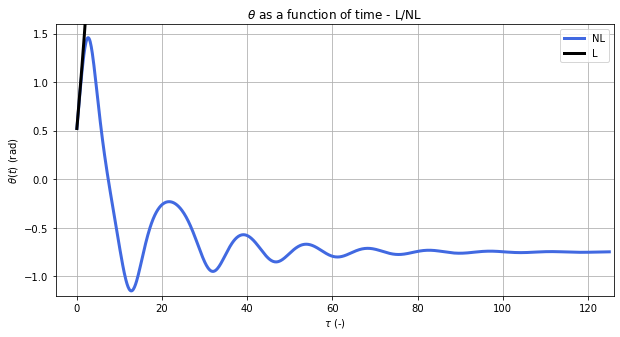

In [4]:
p = 1.1 # control parameter

theta0, d_theta0 = 30, 30
x = np.array([theta0, d_theta0]) * np.pi/180 #from degrees to radiants

# ------

t = np.linspace(0, 125, 1000)
u_sol_NL = odeint(NL_system, x, t)
u_sol_L  = odeint( L_system, x, t)

plt.figure(figsize=(10,5))

plt.plot(t, u_sol_NL[:,0], '-' , color='royalblue', lw=3, label='NL')
plt.plot(t, u_sol_L [:,0], 'k-'                   , lw=3, label='L')

plt.title(r'$\theta$ as a function of time - L/NL')
plt.xlabel(r'$\tau$ (-)')
plt.ylabel(r'$\theta(t)$ (rad)')

plt.axis((-5, 126, -1.2, 1.6))

plt.grid(True)
plt.legend()

**Once bifurcation graph ploted, see these points on graph.**

### Phase portrait, trivial fixed point.

The trajectory of the nonlinear dynamical system $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\tau)$ can also be represented in the phase plane. Here is the result for $p=1.1$.

<img  src="Figures sujet/Trajectory_p1p1_phase_plane.png" width=500/>

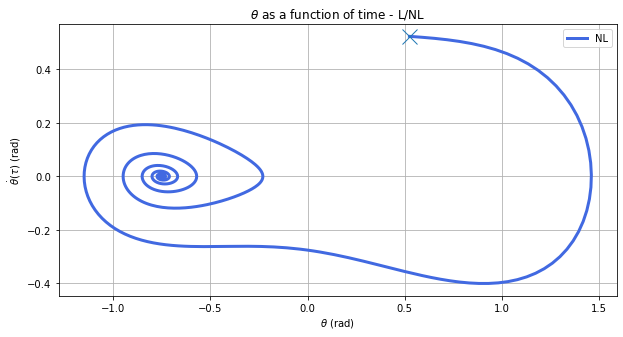

In [5]:
# recall
p = 1.1 # control parameter

theta0, d_theta0 = 30, 30
x = np.array([theta0, d_theta0]) * np.pi/180 #from degrees to radiants

# ------

plt.figure(figsize=(10,5))

plt.plot(u_sol_NL[:,0], u_sol_NL[:,1], '-' , color='royalblue', lw=3, label='NL')
plt.plot(x[0], x[1], 'x', markersize=15)

plt.title(r'$\theta$ as a function of time - L/NL')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\dot{\theta}(\tau)$ (rad)')

# plt.axis((-5, 126, -1.2, 1.6))

plt.grid(True)
plt.legend()

### The sum of many trajectories starting at various $\mathbf{x}_0$ constitute the phase portrait

We can plot the phase portrait at $p=1.1$. Note that the trajectories never cross.

<img  src="Figures sujet/Phase_portrait.png" width=500/>

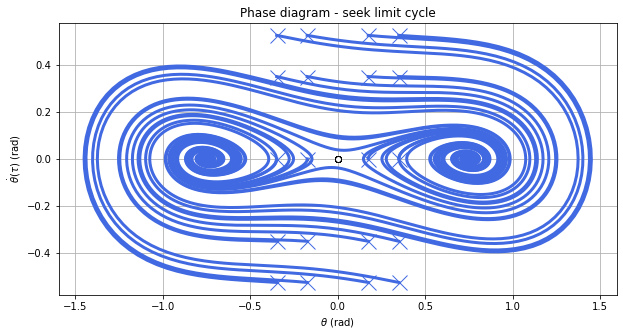

In [6]:
x_vector = np.array([[-20, +30],
                     [-10, +30],
                     [+10, +30],
                     [+20, +30],
                     [-20, +20],
                     [-10, +20],
                     [+10, +20],
                     [+20, +20],
                     [-20, + 0],
                     [-10, + 0],
                     [+10, + 0],
                     [+20, + 0],
                     [-20, -20],
                     [-10, -20],
                     [+10, -20],
                     [+20, -20],
                     [-20, -30],
                     [-10, -30],
                     [+10, -30],
                     [+20, -30]]) * np.pi/180

plt.figure(figsize=(10,5))

for x in x_vector:

    # -----
    # Solve
    # -----

    t = np.linspace(0, 125, 1000)
    
    u_sol_NL = odeint(NL_system, x, t)

    # ----
    # Plot
    # ----

    plt.plot(u_sol_NL[:,0], u_sol_NL[:,1], '-', color='royalblue', lw=3)
    plt.plot(x[0], x[1], 'x', color='royalblue', markersize=15)

    plt.plot(0, 0, 'ko', markerfacecolor="white")
    
plt.title('Phase diagram - seek limit cycle')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\dot{\theta}(\tau)$ (rad)')

# plt.axis((-5, 126, -1.2, 1.6))

plt.grid(True)

## Computation of the fixed points bifurcation diagram

The fixed points $\mathbf{x}^{\ast} = \{\theta^{\ast} ; \phi^{\ast}\}$ verify $\dot{\mathbf{x}} = \{\theta(t) ; \phi(t)\} = \mathbf{0} = \mathbf{f}(\mathbf{x}^{\ast})$. This rewrites

\begin{equation}\left\{\begin{array}{ll}
\dot{\theta} = \phi^* = 0  \\
\dot{\phi}^{\ast} = p.sin(\theta^*) - \theta^* = 0 \end{array}\right.\end{equation}

It is actually equivalent to two uncoupled equations. In fine, the only difficult equation to solve is the second one, that we can solve with a Newton-Raphson method. Here is the bifurcation diagram

<img  src="Figures sujet/Bifurcation_diagram.png" width=500/>

In [7]:
def function(x):
    
    """ Returns shape function 
    to seek fixed points.
    """
    
    theta, d_theta = x

    return [d_theta, -1/Q * d_theta - theta + p*np.sin(theta)]

def der_function(sol):
    
    """ Function returning the
    derivative of function given 
    derivative function and point
    sol.
    """
    
    return - 1 + p*np.cos(sol)

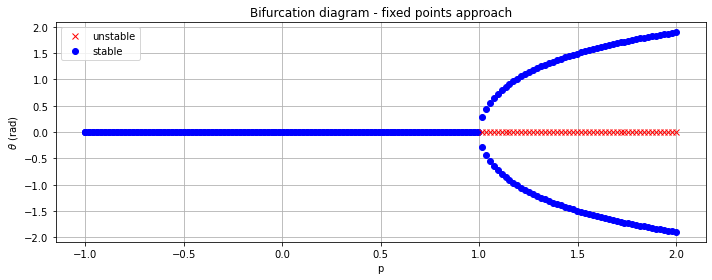

In [8]:
p_vector  = np.linspace(-1, 2, 150)
x0_vector = [-1,0,1] # radian # search fixed point around these values, then we'll check if points found are stable or unstable

eps = 1E-6

plt.figure(figsize=(10,4))
for p in p_vector:
    for x0i in x0_vector:
        
        # get solution, i.e. fixed point
        root, void = fsolve(function, [x0i,0])
        
        # check is this point is stable by 
        # looking to sign of 2nd derivative
        stable = der_function(root)
        
        if stable > eps:
            curve1,=plt.plot(p, root, 'x', color='red')
        else:
            curve2,=plt.plot(p, root, 'o', color='blue')

plt.title('Bifurcation diagram - fixed points approach')
plt.xlabel('p')
plt.ylabel(r'$\theta$ (rad)')

curve1.set_label('unstable')
curve2.set_label('stable')

plt.grid(True)
plt.legend()

plt.tight_layout()

#### Method with eigenvalues : check nb stability states of one point as a function of p

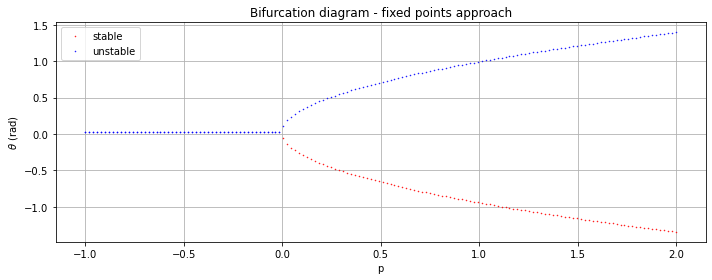

In [9]:
def Jacobian_matrix(x):
    
    """ Function returning the jacobian matrix
    given set of data x in J=J(x).
    """
    
    theta, d_theta = x
    
    return np.array([[0, 1], [p*np.cos(theta), -d_theta/Q]])

# -----

p_vector  = np.linspace(-1, 2, 150)
x0_vector = [0] # radian # search fixed point around these values, then we'll check if points found are stable or unstable

eps = 1E-6

plt.figure(figsize=(10,4))
for x0i in x0_vector:
    for p in p_vector:    
        J = Jacobian_matrix(x)
        lmbda, void = np.linalg.eig(J)
        
        for j in range(2):
            if np.real(lmbda[j]) > eps:
                curve1, = plt.plot(p, np.real(lmbda[j]), 'b.', markersize=1)
            else:
                curve2, = plt.plot(p, np.real(lmbda[j]), 'r.', markersize=1)

plt.title('Bifurcation diagram - fixed points approach')
plt.xlabel('p')
plt.ylabel(r'$\theta$ (rad)')

curve1.set_label('unstable')
curve2.set_label('stable')

plt.grid(True)
plt.legend()

plt.tight_layout()

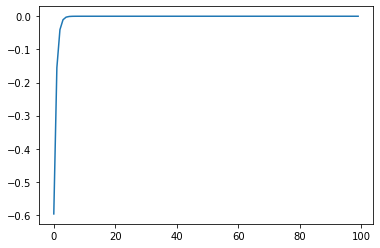

In [10]:
J = Jacobian_matrix(x)
eig_val, eig_vect = np.linalg.eig(J)

time = np.array([[m for n in range(2)] for m in range(100)])

test = eig_vect[0,0]*np.exp(eig_val[0]*time)
plt.plot(time[:,0], test[:,0])

**WTF**

[1] A. Lazarus, C. Maurini and S. Neukirch, Stability of discretized nonlinear elastic systems, in Extremely Deformable Structures, 1-53, Springer, 2015.